# Bloco 2- Métodos de Modelagem dos Dados

## Dados

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Código para ler o arquivo em xls e retorná-lo em dataframe
dfbr = pd.read_excel("dados brasileirao.xlsx") 

# Nesta linha, foram retiradas todas as colunas que possuiam dados relativos à estáticas após o começo do jogo. Os Dados após o jogo começar não nos ajudam a prever os nossos resultados, pois são muito específicos de cada jogo. Então vamos analisar o principal: número de gols
dfbr = dfbr.drop(["escanteios_man", "escanteios_vis", "publico_max", "faltas_man", "faltas_vis", "chutes_bola_parada_man", "chutes_bola_parada_vis", "defesas_man", "defesas_vis", "impedimentos_man", "impedimentos_vis", "chutes_man", "chutes_vis", "chutes_fora_man", "chutes_fora_vis", "gols_1_tempo_man", "gols_1_tempo_vis"], axis=1)

# Nesta linha, foram tiradas todas as linhas que possuiam dados faltantes, visto que os anos iniciais não tinham todos os dados da tabela preenchidos.
dfbr = dfbr.dropna(axis = 0)

# Nesta linha, são redefinidos os índices para facilitar o trabalho com os dados e foi feito após retirar os dados que não íamos precisar.
dfbr = dfbr.reset_index()

# Nesta parte, foram retiradas as colunas "index" e "Unnamed: 0" para facilitar o trabalho com os dados (Eram colunas com repetição de índices antigos)
dfbr = dfbr.drop(columns=["index", "Unnamed: 0"])

c:\venv\ilumpy\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


## Divisão do dataset

In [2]:
# Divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.1 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man","colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis","gols_vis","colocacao_vis","ano_campeonato"]
TARGET = ["gols_man"]

# Divide os dados para se adequarem aos modelos

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values

Nessa etapa foi preciso fazer a divisão do dataset em treino e teste, uma vez que, nesse bloco o foco era fazer a modelagem dos nossos dados. E com isso, dividimos os atributos que seriam colocados como features e como target (gols feito pela equipe mandante)

### Modelo Baseline

In [3]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Cria um modelo baseline para termos uma base de comparação com outros modelos
modelo_baseline = DummyRegressor()

# Treina o modelo de acordo com os dados escolhidos antes
modelo_baseline.fit(X_treino, y_treino)

# Realiza uma previsão usando o modelo treinado
previsao_baseline = modelo_baseline.predict(X_teste)
print(f"O time mandante faria {previsao_baseline[0]} gols")

# Verificando o erro do modelo usando o RMSE (root mean squared error)
y_verdadeiro = y_teste
y_previsao_baseline = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao_baseline, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE} gols.")

O time mandante faria 1.5049683830171634 gols
O RMSE do modelo baseline foi de 1.1665724061927247 gols.


Nessa parte, foi preciso fazer o baseline para termos um parâmetro de comparação com outros modelos e também foi calculado o erro (RMSE) referente a tal modelagem.

### Regressão Linear

In [4]:
from sklearn.linear_model import LinearRegression

# Cria um modelo linear
modelo_linear = LinearRegression()

# Treina esse modelo 
modelo_linear.fit(X_treino, y_treino)

# Realiza uma previsão usando o modelo treinado
previsao_linear = modelo_linear.predict(X_teste)
print(previsao_linear[0]) # Foi escolhida apenas uma linha para melhorar a visualização

# Verificando o erro do modelo usando o RMSE (root mean squared error)

y_verdadeiro = y_teste
y_previsao_linear = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao_linear, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE} gols.")

[1.54035654]
O RMSE do modelo linear foi de 1.1010162933686618 gols.


A primeira abordagem foi feita usado regressão linear e com ela observamos um erro menor em comparação ao baseline.

### Regressão Linear Normalizada

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Usa um função normalizadora sobre os dados

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

# Cria um modelo linear
modelo_linear_norm = LinearRegression()

# Treina esse modelo
modelo_linear_norm.fit(
    normalizador_x.transform(X_treino),
    normalizador_y.transform(y_treino),
)

# Realiza uma previsão usando o modelo linear normalizado treinado
previsao = modelo_linear_norm.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

# Verificando o erro do modelo usando o RMSE (root mean squared error)

y_verdadeiro = y_teste
y_previsao = modelo_linear_norm.predict(normalizador_x.transform(X_teste))
y_previsao = normalizador_y.inverse_transform(y_previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE} gols.")


[[1.82152712]
 [1.71269558]
 [1.80884794]
 ...
 [1.15358695]
 [1.54537951]
 [1.55884239]]
O RMSE do modelo linear foi de 1.1010162933686638 gols.


A normalização, algo muito importante a ser feito em machine learning, visto que, ajuda a ter um menor erro pelo controle da dispersão dos dados, no nosso dataset não mostrou uma diferença considerável. Por exemplo, podemos citar os valores do time mandante na mesma feature que estão sempre em uma ordem de grandeza próxima ou igual.

### k-NN / k vizinhos

In [6]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao[0])

[1.2]


In [7]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo k-NN foi de {RMSE} gols.")

O RMSE do modelo k-NN foi de 1.2451610191010816 gols.


In [8]:
NUM_VIZINHOS = [1, 10, 100]

for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE} gols.")

O RMSE do modelo k-NN usando k=1 foi de 1.5821006909640374 gols.
O RMSE do modelo k-NN usando k=10 foi de 1.1816806541350324 gols.
O RMSE do modelo k-NN usando k=100 foi de 1.1231268832786456 gols.


No K Vizinhos tivemos um pior erro comparado ao da regressão linear, mas que diminui quando aumentamos o número de vizinhos.

### Árvore de Decisão

In [10]:
# Árvore de Decisão

from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao[1]) # Escolhido apenas um elemento para facilitar a visualização

y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} gols.")

1.0
O RMSE do modelo árvore de decisão foi de 1.6809395614746618 gols.


In [11]:
# Árvore de decisões com hiperparâmetros

from itertools import product

NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 1, 2, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.3f} gols."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 1.681 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=1 foi de 1.140 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=2 foi de 1.125 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 1.130 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 1.333 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 1.121 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=1 foi de 1.140 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=2 foi de 1.125 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 1.121 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 1.121 gols.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 1.166 gols.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=1 foi de 1.140 gols.
O RMSE do modelo AD usando max_leaf_nodes=36 e m

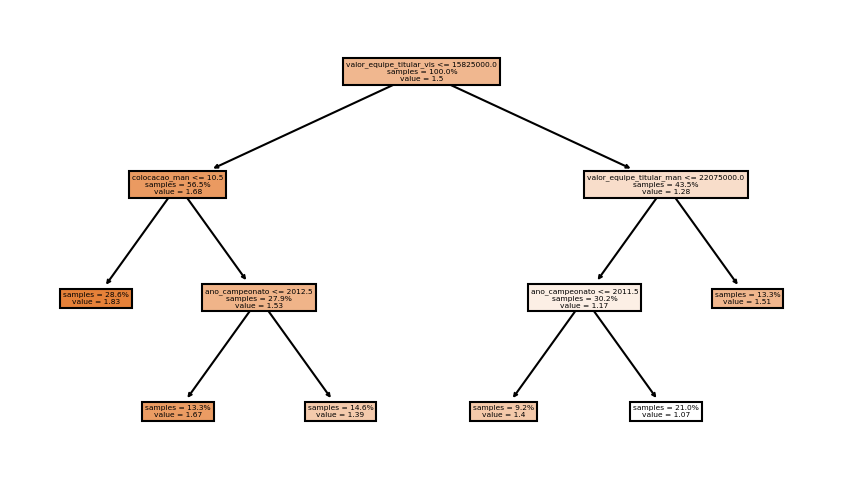

In [12]:
# Visualização da Árvore de Decisão

from matplotlib import pyplot as plt
from sklearn import tree

# Cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# Cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# Plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# Salva a imagem
#plt.savefig('ÁrvoreDoFut.png',facecolor='white')

# Mostra o plot para o usuário
plt.show()

Nessa modelagem precisamos controlar a profunidade e o número de folhas que queríamos que estivesse na árvore de decisão e isso foi crucial para o controle de erro dos nossos dados. Assim, o melhor parâmetro que encontramos foi com max_leaf_nodes=6 e max_depth=3, max_depth=10 ou max_depth= None. Assim, percebemos que a profundidade foi menos relevante que o número de folhas. 

### Floresta Aleatória

In [13]:
# Floresta Aleatória

from sklearn.ensemble import RandomForestRegressor

# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print()
print(previsao[0]) # Escolhido um elemento para facilitar a visualização

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo floresta de decisão foi de {RMSE} gols.")

(4428, 1) (493, 1)
(4428,) (493,)

1.83
O RMSE do modelo floresta de decisão foi de 1.1285866872998755 gols.


In [14]:
# Floresta Aleatória com Hiperparâmetros

from itertools import product

NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.3f} gols."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 1.171 gols.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 1.129 gols.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 1.120 gols.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 1.113 gols.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 1.115 gols.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi de 1.114 gols.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 1.115 gols.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 1.117 gols.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=6 e max_depth=None foi de 1.117 gols.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=3 foi de 1.114 gols.
O RMSE do modelo RF usando n

Na floresta o RMSE se comportou de forma melhor do que na árvore de decisão, porém não teve nenhuma diferença significativa.

### Importância das Features

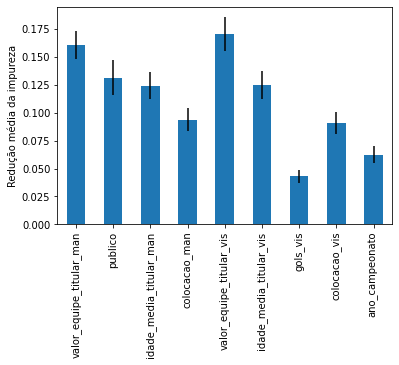

In [15]:
# Importância das Features com a Impureza

N_ARVORES = 50
N_JOBS = 4

modelo_rf = RandomForestRegressor(
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,
)

modelo_rf.fit(X_treino, y_treino)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

In [16]:
# Importância das Features com a Permutação e grupo de treino

from sklearn.inspection import permutation_importance

N_REPETICOES = 10


def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_treino
y_local = y_treino

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<25}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9438965651171258

valor_equipe_titular_vis 0.231 +/- 0.004
valor_equipe_titular_man 0.180 +/- 0.002
colocacao_man            0.139 +/- 0.003
ano_campeonato           0.102 +/- 0.002
publico                  0.095 +/- 0.002
colocacao_vis            0.088 +/- 0.002
idade_media_titular_man  0.088 +/- 0.001
idade_media_titular_vis  0.086 +/- 0.001
gols_vis                 0.050 +/- 0.001


In [17]:
# Importância das Features com a Permutação e grupo de teste

X_local = X_teste
y_local = y_teste

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos para as features mais importantes
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<25}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.6620541401273883

valor_equipe_titular_vis 0.022 +/- 0.007
publico                  0.007 +/- 0.003
gols_vis                 0.005 +/- 0.002


Nessa etapa, verificamos a importância que cada feature tinha no nossos resultados e plotamos um gráfico para fazer essa análise com o fim de remover alguma que não fosse relevante. Depois de analisá-los, decidimos tirar o ano do campeonato para métodos futuros de modelagem.

## Usando Classificação

### Reorganizando os dados

In [18]:
# Cria uma lista de condições
Condições = [
    (dfbr['gols_man'] > dfbr['gols_vis']),
    (dfbr['gols_man'] == dfbr['gols_vis']),
    (dfbr['gols_man'] < dfbr['gols_vis'])
    ]

# Cria uma lista com os possíveis resultados
Valores = ['Vitória', 'Empate', 'Derrota']

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

dfbr.head()

,ano_campeonato,data,horario,rodada,estadio,arbitro,publico,time_man,time_vis,tecnico_man,tecnico_vis,colocacao_man,colocacao_vis,valor_equipe_titular_man,valor_equipe_titular_vis,idade_media_titular_man,idade_media_titular_vis,gols_man,gols_vis,resultado_man
0,2007,2007-05-03,12:00,1,Estádio Governador Magalhães Pinto,Elmo Alves Resende Cunha,5116.0,Atlético-MG,Náutico,Tico dos Santos,Paulo César Gusmão,7.0,13.0,1650000.0,500000.0,24.6,26.4,2.0,1.0,Vitória
1,2007,2007-05-03,12:00,1,Estádio Jornalista Mário Filho,Leonardo Gaciba da Silva,7801.0,Flamengo,Palmeiras,Ney Franco,Caio Júnior,16.0,4.0,550000.0,3750000.0,26.2,26.7,2.0,4.0,Derrota
2,2007,2007-05-03,12:00,1,Estádio Jornalista Mário Filho,Wallace Nascimento Valente,12132.0,Fluminense,Cruzeiro,Renato Gaúcho,Dorival Júnior,11.0,10.0,7200000.0,5750000.0,24.4,24.1,2.0,2.0,Empate
3,2007,2007-05-03,12:00,1,Estádio Durival Britto e Silva,Elvecio Zequetto,3568.0,Paraná,Grêmio,Zetti,Mano Menezes,3.0,20.0,1000000.0,1500000.0,26.5,24.0,3.0,0.0,Vitória
4,2007,2007-05-03,12:00,1,Estádio Adelmar da Costa Carvalho,Antonio Hora Filho,23273.0,Sport Recife,Santos FC,Giba,Vanderlei Luxemburgo,2.0,19.0,2750000.0,5350000.0,26.2,24.4,4.0,1.0,Vitória


In [19]:
# Nova divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.3 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man","colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis","colocacao_vis"]
TARGET = ["resultado_man"]

# Divide os dados para se adequarem aos modelos

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values

Nessa etapa reorganizamos os dados e decidimos trocar o target para uma melhor análise, uma vez que, trabalhar com o número de gols não era algo tão interresante na previsão por causa do RMSE e então decidimos tentar uma nova abordagem.

### k-NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# cria o modelo
modelo_knn = KNeighborsClassifier()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao[0])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Empate
Accuracy: 0.3886255924170616


c:\venv\ilumpy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(previsao, return_counts=True)
Matriz_Resultados_Previstos_kNN = np.column_stack((resultados_mandante, quantidade)) 
print(Matriz_Resultados_Previstos_kNN)

[['Derrota' 449]
 ['Empate' 348]
 ['Vitória' 680]]


In [25]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_kNN = confusion_matrix(y_teste, previsao)
print(Matriz_Confusao_kNN)

[[102 105 112]
 [136  87 183]
 [211 156 385]]


In [26]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

     Derrota       0.23      0.32      0.27       319
      Empate       0.25      0.21      0.23       406
     Vitória       0.57      0.51      0.54       752

    accuracy                           0.39      1477
   macro avg       0.35      0.35      0.34      1477
weighted avg       0.41      0.39      0.39      1477



Com uma nova abordagem focada em resultados, ou seja, Vitória, Empate e Derrota do time mandante, conseguimos ter uma melhor dinâmica dos dados mas uma pior acurácia usando o K Vizinhos. Nessa modelagem também, tivemos uma precisão de 57% para vitórias e acurácia de 38% para o modelo.

### Árvore de Decisão

In [29]:
from sklearn.tree import DecisionTreeClassifier

# cria o modelo
modelo_dt = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao[0])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Vitória
Accuracy: 0.4001354096140826


In [30]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(previsao, return_counts=True)
Matriz_Resultados_Previstos_AD = np.column_stack((resultados_mandante, quantidade)) 
print(Matriz_Resultados_Previstos_AD)

[['Derrota' 331]
 ['Empate' 436]
 ['Vitória' 710]]


In [31]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_AD = confusion_matrix(y_teste, previsao)
print(Matriz_Confusao_AD)

[[ 95  90 134]
 [ 86 120 200]
 [150 226 376]]


In [33]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

     Derrota       0.29      0.30      0.29       319
      Empate       0.28      0.30      0.29       406
     Vitória       0.53      0.50      0.51       752

    accuracy                           0.40      1477
   macro avg       0.36      0.36      0.36      1477
weighted avg       0.41      0.40      0.40      1477



Aqui tivemos uma acurácia de 40% e uma precisão no acerto de vitórias 53%.

### Floresta Aleatória

In [34]:
# Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier

# cria o modelo
modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino.ravel())

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print(previsao[0])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Vitória
Accuracy: 0.4928909952606635


In [35]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(previsao, return_counts=True)
Matriz_Resultados_Previstos_FA = np.column_stack((resultados_mandante, quantidade)) 
print(Matriz_Resultados_Previstos_FA)

[['Derrota' 213]
 ['Empate' 204]
 ['Vitória' 1060]]


In [36]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_FA = confusion_matrix(y_teste, previsao)
print(Matriz_Confusao_FA)

[[ 80  62 177]
 [ 55  58 293]
 [ 78  84 590]]


In [37]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

     Derrota       0.38      0.25      0.30       319
      Empate       0.28      0.14      0.19       406
     Vitória       0.56      0.78      0.65       752

    accuracy                           0.49      1477
   macro avg       0.41      0.39      0.38      1477
weighted avg       0.44      0.49      0.45      1477



In [38]:
# Floresta Aleatória com hiperparâmetros

from itertools import product

NUM_ARVORES = [50]
NUM_FOLHAS = [3, 6, 9]
NUM_PROFUNDIDADE = [2, 3, 6]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestClassifier(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino.ravel())

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    
    acuracia = metrics.accuracy_score(y_teste, y_previsao)
    #print("Accuracy:",acuracia)
    
    print(
        f"A acurácia do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {acuracia:.4f}."
    )

A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=3 e max_depth=2 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=3 e max_depth=3 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=3 e max_depth=6 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=6 e max_depth=2 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=6 e max_depth=3 foi de 0.5105.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=6 e max_depth=6 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=9 e max_depth=2 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=9 e max_depth=3 foi de 0.5125.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=9 e max_depth=6 foi de 0.5146.


In [39]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(y_previsao, return_counts=True)
Matriz_Resultados_Previstos_FAH = np.column_stack((resultados_mandante, quantidade)) 
print(Matriz_Resultados_Previstos_FAH)

[['Derrota' 69]
 ['Empate' 1]
 ['Vitória' 1407]]


In [40]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_FAH = confusion_matrix(y_teste, y_previsao)
print(Matriz_Confusao_FAH)

[[ 30   1 288]
 [ 17   0 389]
 [ 22   0 730]]


In [41]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

     Derrota       0.43      0.09      0.15       319
      Empate       0.00      0.00      0.00       406
     Vitória       0.52      0.97      0.68       752

    accuracy                           0.51      1477
   macro avg       0.32      0.35      0.28      1477
weighted avg       0.36      0.51      0.38      1477



Na floresta aleatória tivemos uma boa acurácia de 49,3% e uma precisão para vitória de 56%. Entretanto, ao realizar a visualização do resultado vimos que tivemos um número alto de vitórias, muito mais que empates e derrotas, mais ainda sim com uma boa dispersão dos dados.

Quando usamos hiperparâmetros de número de árvores, folhas e profundidades eles forneceram uma acurácia de 51,4% e uma precisão para vitória de 52%. Todavia, vimos que o modelo previu um número discrepante de vitórias, classificando a quase totalidade dos jogos como vitória do mandante. Acreditamos que isso aconteceu por causa de uma hiperespecialização das folhas que considerou pequenas diferenças de valores e deu vitória para o maior, mesmo que com uma diferença pouco relevante.